# Disaster Tweet Predictions

A notebook going through a simple method for classifying disaster tweets

### Imports

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from processor import get_pipe, GraphGenerator, PreprocessText
from sklearn.metrics import f1_score


c:\Users\khila\.conda\envs\neural\lib\site-packages\shap\utils\_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
c:\Users\khila\.conda\envs\neural\lib\site-packages\shap\utils\_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimization_order(all_masks,

### Loading data

In [2]:
df = pd.read_csv("data/train.csv")
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
df.shape


(7613, 5)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df[['text']], df['target'], test_size=0.2, random_state=42)

### Loading sklearn pipeline

In [5]:
pipe = get_pipe()

In [6]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocess', PreprocessText()),
                ('vectorizer', CustomVectorizer()), ('clf', LGBMClassifier())])

In [7]:
y_pred = pipe.predict(X_test)

In [8]:
y_proba = pipe.predict_proba(X_test)[:, 1]

In [9]:
gen = GraphGenerator(X_test, y_test, pipe)

In [10]:
graph_dict=gen.generate_graphs()

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [11]:
pd.Series(y_proba)

0       0.150762
1       0.110844
2       0.361793
3       0.028265
4       0.144964
          ...   
1518    0.344037
1519    0.737674
1520    0.945552
1521    0.986691
1522    0.175279
Length: 1523, dtype: float64

In [12]:
for i in graph_dict:
    print(i)

roc_curve.png
pos_conf.png
probability_freq.png
pr_curve.png
calibration curve.png
confusion_matrix.png
shap.png


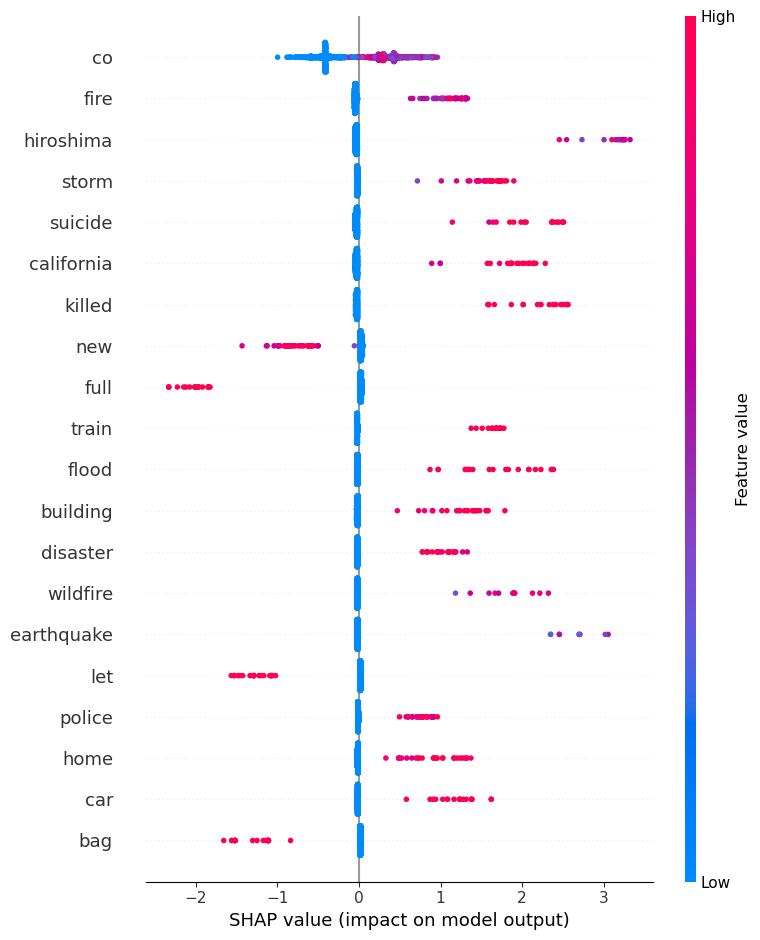

In [13]:
graph_dict["shap.png"]

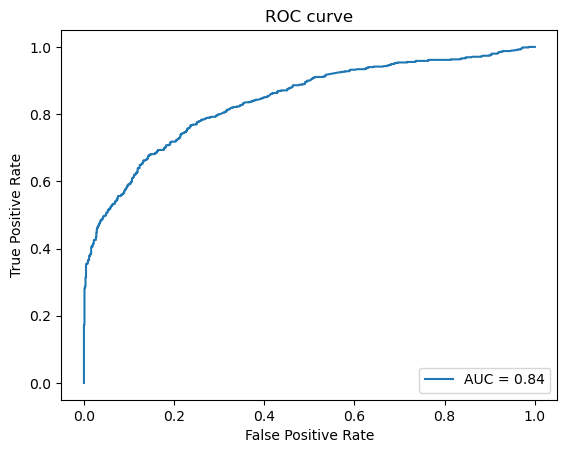

In [14]:
graph_dict["roc_curve.png"]


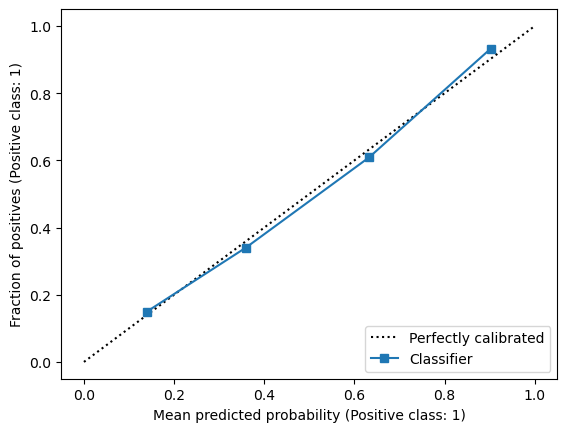

In [15]:
graph_dict["calibration curve.png"]

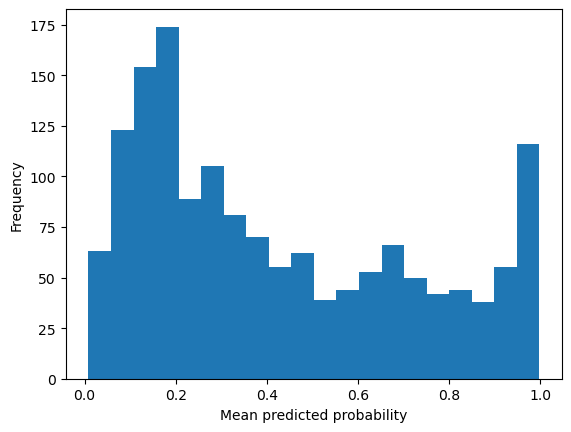

In [16]:
graph_dict["probability_freq.png"]

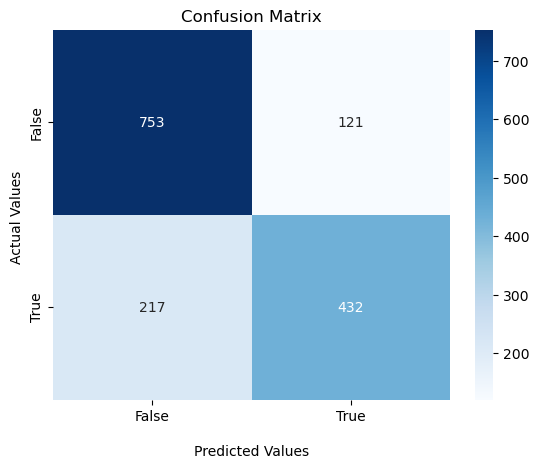

In [17]:
graph_dict["confusion_matrix.png"]

In [18]:
processor=PreprocessText()
processed_text=processor.fit_transform(X_train)

NameError: name 'train_df' is not defined

In [ ]:
processed_text.iloc[6]

'builder dental emergency ruined plan emotionally blackmail afternoon bump'

In [ ]:
X_train.text.iloc[6]

'Our builder is having a dental emergency. Which has ruined my plan to emotionally blackmail him this afternoon with my bump.'

In [ ]:
# Calculate the F1 score for the predictions
f1 = f1_score(y_test, y_pred)

print("F1 score:", f1)

F1 score: 0.718801996672213


In [ ]:
import numpy as np
np.around(y_proba)

array([0., 0., 0., ..., 1., 1., 0.])

In [ ]:
y_proba

array([0.15076214, 0.11084389, 0.36179316, ..., 0.94555241, 0.9866906 ,
       0.17527891])